#### Implementing pivot_table() function in pandas to create a spreadsheet-style pivot table, especially  for summarizing, analyzing and visualizing data 

## Importing libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Exploring the Dataset

In [5]:
df= pd.read_excel('ANALYSIS BY PIVOT TABLE.xlsx',sheet_name=2)

#### Head of the dataset

In [6]:
df.head()

,SKU ID,TranslatedTitle,brand,Is UL,ProductURL,Seller-Name,packtype,Units,Volume (ml),quantity,...,API Tier,Grammage Tier,Offer Price,Rating,Number of Reviews,Hygiene benefit,Refill,Value,Discount %,Purchase Date
0,677408,DelightÃƒÂ‚ Aqua Lux Body Wash 250ml,lux,1,https://www.jd.id/product/lux-body-wash-aqua-d...,JD.id,Single,Milliliter,250.0,2,...,Tire 2,300 - 500 ML,19.0,4.0,75,NaN,NaN,38.0,0.09,2019-06-24
1,677410,Lux Body Wash 250ml Magical Spell,lux,1,https://www.jd.id/product/lux-body-wash-magica...,JD.id,Single,Milliliter,250.0,10,...,Tire 2,200 - 250 ML,19.0,3.5,179,NaN,NaN,190.0,0.13,2018-02-02
2,677412,Lux Body Wash 250ml Velvet Jasmine,lux,1,https://www.jd.id/product/lux-body-wash-velvet...,JD.id,Single,Milliliter,250.0,2,...,Tire 2,200 - 250 ML,19.0,5.0,69,NaN,NaN,38.0,0.06,2019-11-13
3,677440,Lux Body Wash Refill 450ml Velvet Jasmine,lux,1,https://www.jd.id/product/lux-body-wash-velvet...,JD.id,Single,Milliliter,450.0,8,...,Tire 2,300 - 500 ML,24.0,2.8,1030,NaN,Refill,192.0,0.09,2018-10-23
4,677443,Lux Body Wash Refill 450ml White Camellia,lux,1,https://www.jd.id/product/lux-body-wash-camell...,JD.id,Single,Milliliter,450.0,3,...,Tire 2,300 - 500 ML,24.5,5.0,371,NaN,Refill,73.5,0.08,2019-12-11


### More information about the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SKU ID             390 non-null    int64         
 1   TranslatedTitle    390 non-null    object        
 2   brand              390 non-null    object        
 3   Is UL              390 non-null    int64         
 4   ProductURL         390 non-null    object        
 5   Seller-Name        272 non-null    object        
 6   packtype           390 non-null    object        
 7   Units              390 non-null    object        
 8   Volume (ml)        390 non-null    float64       
 9   quantity           390 non-null    int64         
 10  API Flag           390 non-null    int64         
 11  CBP                335 non-null    object        
 12  CBP_Brand          389 non-null    object        
 13  Pack Size          390 non-null    object        
 14  User      

#### Tire quantity sold based on discount grouped by tire quality

In [8]:
a1=pd.pivot_table(df,values='quantity',index='API Tier',columns='Discount %',aggfunc='sum')
a1

Discount %,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15
API Tier,,,,,,,,,,,
Tire 1,28.0,30.0,44.0,12.0,11.0,30.0,45.0,1.0,27.0,14.0,48.0
Tire 2,113.0,67.0,67.0,101.0,100.0,52.0,108.0,122.0,63.0,87.0,96.0
Tire 3,25.0,28.0,29.0,13.0,5.0,28.0,16.0,21.0,35.0,35.0,35.0
Tire 4,25.0,11.0,21.0,10.0,NaN,7.0,7.0,10.0,33.0,7.0,11.0
Tire 5,51.0,35.0,76.0,55.0,61.0,44.0,9.0,62.0,37.0,52.0,36.0


### Now find the same pivot table based on average

In [9]:
a2=pd.pivot_table(df,values='quantity',index='API Tier',columns='Discount %',aggfunc='mean').round(2)
a2

Discount %,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15
API Tier,,,,,,,,,,,
Tire 1,5.60,5.00,5.50,4.00,5.50,7.50,6.43,1.00,6.75,7.00,6.86
Tire 2,6.65,4.79,6.70,5.05,6.67,4.73,4.91,6.42,6.30,5.44,6.00
Tire 3,4.17,4.00,5.80,4.33,1.67,4.00,5.33,5.25,7.00,5.83,5.83
Tire 4,5.00,5.50,7.00,5.00,NaN,3.50,7.00,10.00,5.50,2.33,5.50
Tire 5,8.50,3.50,6.33,6.88,6.78,4.40,3.00,7.75,5.29,4.73,7.20


### Showing above two type in one pivot table

In [10]:
a3=pd.pivot_table(df,values='quantity',index='API Tier',columns='Discount %',aggfunc=('sum','mean')).round(2)
a3

mean                                                         ...  \
Discount %  0.05  0.06  0.07  0.08  0.09  0.10  0.11   0.12  0.13  0.14  ...   
API Tier                                                                 ...   
Tire 1      5.60  5.00  5.50  4.00  5.50  7.50  6.43   1.00  6.75  7.00  ...   
Tire 2      6.65  4.79  6.70  5.05  6.67  4.73  4.91   6.42  6.30  5.44  ...   
Tire 3      4.17  4.00  5.80  4.33  1.67  4.00  5.33   5.25  7.00  5.83  ...   
Tire 4      5.00  5.50  7.00  5.00   NaN  3.50  7.00  10.00  5.50  2.33  ...   
Tire 5      8.50  3.50  6.33  6.88  6.78  4.40  3.00   7.75  5.29  4.73  ...   

             sum                                                            
Discount %  0.06  0.07   0.08   0.09  0.10   0.11   0.12  0.13  0.14  0.15  
API Tier                                                                    
Tire 1      30.0  44.0   12.0   11.0  30.0   45.0    1.0  27.0  14.0  48.0  
Tire 2      67.0  67.0  101.0  100.0  52.0  108.0  122.0  63.0  87.0  96.0  
Tire 3      28.0  29.0   13.0    5.0  28.0   16.0   21.0  35.0  35.0  35.0  
Tire 4      11.0  21.0   10.0    NaN   7.0    7.0   10.0  33.0   7.0  11.0  
Tire 5      35.0  76.0   55.0   61.0  44.0    9.0   62.0  37.0  52.0  36.0  

[5 rows x 22 columns]

### Now replace the null value with zero

In [11]:
a4=pd.pivot_table(df,values='quantity',index='API Tier',columns='Discount %',aggfunc='sum',fill_value=0)
a4

Discount %,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15
API Tier,,,,,,,,,,,
Tire 1,28,30,44,12,11,30,45,1,27,14,48
Tire 2,113,67,67,101,100,52,108,122,63,87,96
Tire 3,25,28,29,13,5,28,16,21,35,35,35
Tire 4,25,11,21,10,0,7,7,10,33,7,11
Tire 5,51,35,76,55,61,44,9,62,37,52,36


### Adding an additional row containing absulate differences of tire 2 and tire 5

In [14]:
a4.loc['Difference between tire 2 and 5'] = abs(a4.loc['Tire 2'] - a4.loc['Tire 5'])
a4

Discount %,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15
API Tier,,,,,,,,,,,
Tire 1,28,30,44,12,11,30,45,1,27,14,48
Tire 2,113,67,67,101,100,52,108,122,63,87,96
Tire 3,25,28,29,13,5,28,16,21,35,35,35
Tire 4,25,11,21,10,0,7,7,10,33,7,11
Tire 5,51,35,76,55,61,44,9,62,37,52,36
Difference between tire 2 and 5,62,32,9,46,39,8,99,60,26,35,60


### Adding a column representing mode of discount

In [16]:
a4['Mode of discount']=a4.mode(axis=1)[0]
a4

Discount %,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,Mode of discount
API Tier,,,,,,,,,,,,
Tire 1,28,30,44,12,11,30,45,1,27,14,48,30.0
Tire 2,113,67,67,101,100,52,108,122,63,87,96,67.0
Tire 3,25,28,29,13,5,28,16,21,35,35,35,35.0
Tire 4,25,11,21,10,0,7,7,10,33,7,11,7.0
Tire 5,51,35,76,55,61,44,9,62,37,52,36,9.0
Difference between tire 2 and 5,62,32,9,46,39,8,99,60,26,35,60,60.0


### Adding another column representing median of discount

In [17]:
a4['Median of discount']=a4.median(axis=1)
a4

Discount %,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,Mode of discount,Median of discount
API Tier,,,,,,,,,,,,,
Tire 1,28,30,44,12,11,30,45,1,27,14,48,30.0,29.0
Tire 2,113,67,67,101,100,52,108,122,63,87,96,67.0,91.5
Tire 3,25,28,29,13,5,28,16,21,35,35,35,35.0,28.0
Tire 4,25,11,21,10,0,7,7,10,33,7,11,7.0,10.0
Tire 5,51,35,76,55,61,44,9,62,37,52,36,9.0,47.5
Difference between tire 2 and 5,62,32,9,46,39,8,99,60,26,35,60,60.0,42.5


### Adding another column representing Standard deviation of discount

In [18]:
a4['std of discount']=a4.std(axis=1)
a4

Discount %,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,Mode of discount,Median of discount,std of discount
API Tier,,,,,,,,,,,,,,
Tire 1,28,30,44,12,11,30,45,1,27,14,48,30.0,29.0,14.176543
Tire 2,113,67,67,101,100,52,108,122,63,87,96,67.0,91.5,22.000583
Tire 3,25,28,29,13,5,28,16,21,35,35,35,35.0,28.0,9.482778
Tire 4,25,11,21,10,0,7,7,10,33,7,11,7.0,10.0,8.889637
Tire 5,51,35,76,55,61,44,9,62,37,52,36,9.0,47.5,19.422430
Difference between tire 2 and 5,62,32,9,46,39,8,99,60,26,35,60,60.0,42.5,24.520400


## Let's plot a pivot table 

In [19]:
a5=pd.pivot_table(df,values='quantity',index='API Tier',columns='Discount %',aggfunc='sum',fill_value=0)

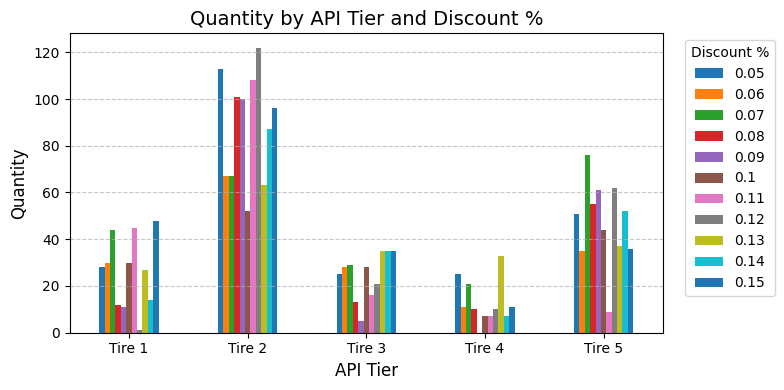

In [20]:
a5.plot(kind='bar',figsize=(8, 4))
plt.title('Quantity by API Tier and Discount %', fontsize=14)
plt.xlabel('API Tier', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Discount %',bbox_to_anchor=(1.2,1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Let's plot a heatmap

<Axes: xlabel='Discount %', ylabel='API Tier'>

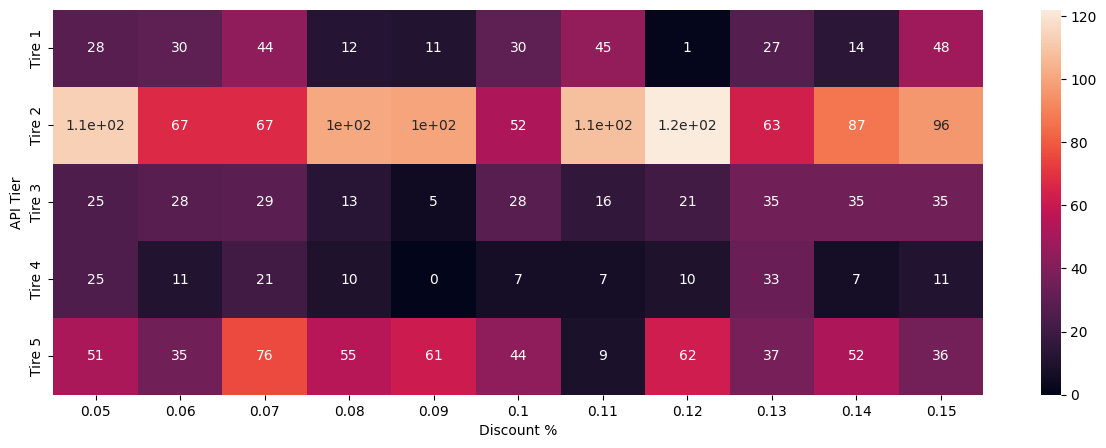

In [21]:
plt.figure(figsize=(15,5))
sns.heatmap(a5,annot=True)

#### Let's make this pivot table into a dataframe

In [74]:
a5.reset_index()

Discount %,API Tier,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15
0,Tire 1,28,30,44,12,11,30,45,1,27,14,48
1,Tire 2,113,67,67,101,100,52,108,122,63,87,96
2,Tire 3,25,28,29,13,5,28,16,21,35,35,35
3,Tire 4,25,11,21,10,0,7,7,10,33,7,11
4,Tire 5,51,35,76,55,61,44,9,62,37,52,36


### Now save to my pc

In [22]:
a5.to_csv('pivot_table_data.csv', index=False)